##System check

In [14]:
import sys
osx = sys.platform

##Directory change

In [15]:
import os
if(osx == "win32"):
    os.chdir('C:\Users\dhrre\Desktop\Projects\Handwriting_recognition_using_neural_nets_on_FPGA\Image processing')
else:
    print("OSX ERROR")
os.getcwd()

'C:\\Users\\dhrre\\Desktop\\Projects\\Handwriting_recognition_using_neural_nets_on_FPGA\\Image processing'

##Imports and setup

In [16]:
import numpy as np
from IPython.display import Image
import matplotlib
from matplotlib.pyplot import imshow
from PIL import Image
import copy

##Class=> image_processing

In [17]:
class image_processing() : 
    
    def __init__(self) : 
        pass
    
    def convolution(self,image,kernel) : 
        scaling_factor = kernel[0]
        kernel = kernel[1]
        image_width = len(image[0])
        image_height = len(image)
        kernel_width = len(kernel[0])
        kernel_height = len(kernel)

        return_image = []

        def element_wise_matrix_multiplication(matrix1,matrix2,scaling_factor=1) :
            return_value = 0
            for m1_row,m2_row in zip(matrix1,matrix2) :
                for m1_pixel,m2_pixel in zip(m1_row,m2_row) :
                    return_value += int(m1_pixel)*int(m2_pixel)
            return np.uint8(return_value/scaling_factor)
                
        for row in range(image_height - kernel_height + 1) :
            return_image.append([])
            for pixel in range(image_width - kernel_width + 1) :
                image_slice = [[image[i,j] for j in range(pixel,pixel + kernel_width)] for i in range(row,row + kernel_height)]
                #print(image_slice)
                return_image[-1].append(element_wise_matrix_multiplication(image_slice,kernel,scaling_factor))
        return np.array(return_image)
    
    def rgb_to_greyscale(self,image) : 
        return_image = []
        for row in image : 
            return_image.append([])
            for pixel in row :
                try:
                    [r,g,b,s] = pixel
                except ValueError:
                    [r,g,b] = pixel
                return_image[-1].append(np.uint8((int(r)+int(g)+int(b))/3))
        return np.array(return_image)
    
    def rgb_to_bnw(self,image,threshold) : 
        return_image = []
        for row in image : 
            return_image.append([])
            for pixel in row :
                try:
                    [r,g,b,s] = pixel
                except ValueError:
                    [r,g,b] = pixel
                magnitude= (int(r)+int(g)+int(b))/3
                if(magnitude < threshold) : 
                    return_image[-1].append(np.uint8(1))
                else:
                    return_image[-1].append(np.uint8(255))
        return np.array(return_image)

##Display function

In [18]:
def display(image) : 
    if type(image) is type([]) : 
#         print(image)
#         print(type(image))
        i = len(image)*100 + 11
        for images in image:
            matplotlib.pyplot.subplot(i)
            imshow(images,cmap=matplotlib.pyplot.get_cmap('gray'))
            i = i+1
    else : 
        % matplotlib inline
        imshow(image,cmap=matplotlib.pyplot.get_cmap('gray'))

In [19]:
import cv2

##Smoothened Image Display

In [20]:
def gaussian_filter(self,image) : 
    kernel = [273,[[1,4 ,7 ,4 ,1],
                [4,16,26,16,4],
                [7,26,41,26,7],
                [4,16,26,16,4],
                [1,4 ,7 ,4 ,1]]]
    processed_image = self.convolution(image,kernel)
    return processed_image

## Full convolution

In [21]:
def full_convolution(self,image,*args):
    all_kernels = list(args)
#     print(all_kernels)

    image_width = len(image[0])
    image_height = len(image)
    
    
    def element_wise_matrix_multiplication(matrix1,matrix2,scaling_factor=1) :
        return_value = 0
        for m1_row,m2_row in zip(matrix1,matrix2) :
            for m1_pixel,m2_pixel in zip(m1_row,m2_row) :
                return_value += int(m1_pixel)*int(m2_pixel)
        return np.uint8(return_value/scaling_factor)
    
    def slice_and_multiply(image,kernel,scaling_factor):
        
        [kernel_width,kernel_height] = [len(kernel[0]),len(kernel)]
        
        return_image = []
        for row in range(image_height - kernel_height + 1) :
            return_image.append([])
            for pixel in range(image_width - kernel_width + 1) :
                image_slice = [[image[i,j] for j in range(pixel,pixel + kernel_width)] for i in range(row,row + kernel_height)]
                #print(image_slice)
                return_image[-1].append(element_wise_matrix_multiplication(image_slice,kernel,scaling_factor))
        return np.array(return_image)
    
    def slice_and_multiply_together(image,all_kernels):
        full_kernel = all_kernels[1]
        kernel = full_kernel[1]
        [kernel_width,kernel_height] = [len(kernel[0]),len(kernel)]
        
        return_image = []
        for row in range(image_height - kernel_height + 1) :
            return_image.append([])
            for pixel in range(image_width - kernel_width + 1) :
                image_slice = [[image[i,j] for j in range(pixel,pixel + kernel_width)] for i in range(row,row + kernel_height)]
                #print(image_slice)
                temp = 0
                for full_kernel in all_kernels:
                    kernel = full_kernel[1]
                    temp = np.uint8(temp|element_wise_matrix_multiplication(image_slice,kernel,full_kernel[0]))
                return_image[-1].append(temp)
        return np.array(return_image)
    
    full_kernel = all_kernels[0]
    
    kernel = full_kernel[1]

#     kernel_width = len(kernel[0])
#     kernel_height = len(kernel)
  
    kernel_specs = [len(kernel[0]),len(kernel)]                                #[kernel_width,kernel_height]
    
    if(len(all_kernels) >1):
        for full_kernel in all_kernels[1:]:
            kernel = full_kernel[1]
            kernel_specs_ = [len(kernel[0]),len(kernel)]                        #[kernel_width,kernel_height]
            if(kernel_specs == kernel_specs_):
                flag = 1
#                 print ("flag recvd 1")
            else:
                flag = 0
#                 print ("flag recvd 0")
                break
        if flag == 0:
#             print ("entering one-kernel-at-a-time mode")
            temp = []
            for full_kernel in all_kernels:
#                 print(full_kernel)
#                 print(full_kernel[1])
                im = slice_and_multiply(image,full_kernel[1],full_kernel[0])      #image, kernel, scaling_factor
#                 print("----")
                temp.append(im)
            return(temp)
        if flag ==1:
#             print("entering all-kernels-together-mode")
            im = slice_and_multiply_together(image,all_kernels)       #image, all_kernels
            return(im)
    else:
#         print("just 1 kernel")
        return slice_and_multiply(image,full_kernel[1],full_kernel[0])             #image, kernel, scaling_factor

image_processing.full_convolution = full_convolution

#complete_edge_full_convolution

In [22]:
def complete_edge_full_convolution(self,image) : 
    kernel1 = [1,[[-1,0,1],
                 [-1,0,1],
                 [-1,0,1]]]
    kernel2 = [1,[[1,0,-1],
                 [1,0,-1],
                 [1,0,-1]]]
    kernel3 = [1,[[-1,-1,-1],
                 [0,0,0],
                 [1,1,1]]]
    kernel4 = [1,[[1,1,1],
                 [0,0,0],
                 [-1,-1,-1]]]
    processed_image = self.full_convolution(image,kernel1,kernel2,kernel3,kernel4)
    return processed_image

image_processing.complete_edge_full_convolution = complete_edge_full_convolution


### Import Image

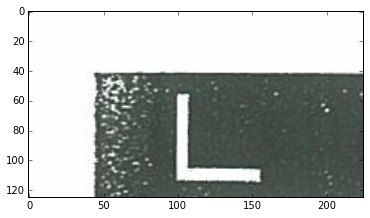

In [23]:
original_image = np.array(Image.open('data_set_collection_related_images/region_of_interest.jpg')) 
display(original_image)

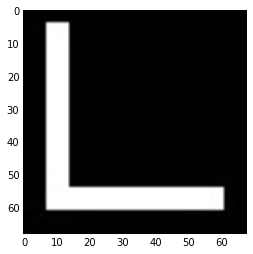

In [24]:
original_kernel = np.array(Image.open('data_set_collection_related_images/kernel.jpg')) 
display(original_kernel)

In [25]:
im = original_image

### Greyscale

In [26]:
impr = image_processing()
greyscale_image = impr.rgb_to_greyscale(im)
cv2.imwrite("C:\Users\dhrre\Desktop\Projects\Handwriting_recognition_using_neural_nets_on_FPGA\Image processing\data_set_collection_related_images\scanned_image_test_grey_scale.jpg",greyscale_image)

True

### Black and White

True

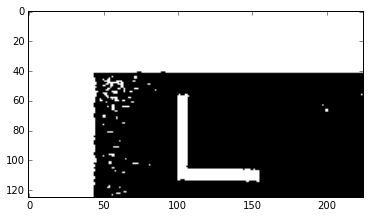

In [27]:
impr = image_processing()
bnw_image = impr.rgb_to_bnw(im,200)
display(bnw_image)
cv2.imwrite("C:\Users\dhrre\Desktop\Projects\Handwriting_recognition_using_neural_nets_on_FPGA\Image processing\data_set_collection_related_images\scanned_image_test_black_and_white.jpg",bnw_image)

True

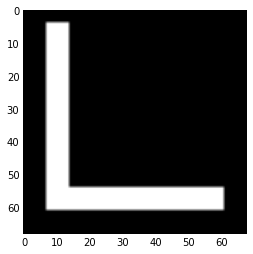

In [28]:
impr = image_processing()
bnw_kernel = impr.rgb_to_bnw(original_kernel,200)
display(bnw_kernel)
cv2.imwrite("C:\Users\dhrre\Desktop\Projects\Handwriting_recognition_using_neural_nets_on_FPGA\Image processing\data_set_collection_related_images\kernel_black_and_white.jpg",bnw_kernel)

In [29]:
impr = image_processing()


display(edge_detect_image)
cv2.imwrite("C:\Users\dhrre\Desktop\Projects\Handwriting_recognition_using_neural_nets_on_FPGA\Image processing\data_set_collection_related_images\scanned_image_test_edge_detected_without_blur.jpg",edge_detect_image)

NameError: name 'edge_detect_image' is not defined

In [30]:
im = bnw_image

### Blur

True

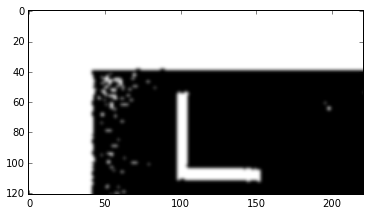

In [31]:
image_processing.gaussian_filter = gaussian_filter
impr = image_processing()
blurred_image = impr.gaussian_filter(im)
display(blurred_image)
cv2.imwrite("C:\Users\dhrre\Desktop\Projects\Handwriting_recognition_using_neural_nets_on_FPGA\Image processing\data_set_collection_related_images\scanned_image_test_blurred.jpg",blurred_image)

In [32]:
im = blurred_image

True

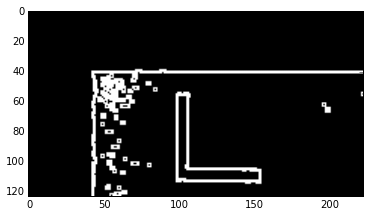

In [123]:
impr = image_processing()
edge_detect_image1 = impr.complete_edge_full_convolution(im)
display(edge_detect_image)
cv2.imwrite("C:\Users\dhrre\Desktop\Projects\Handwriting_recognition_using_neural_nets_on_FPGA\Image processing\data_set_collection_related_images\scanned_image_test_edge_detected.jpg",edge_detect_image)

### Template Matching

In [175]:
def convolution(image,kernel) : 
    scaling_factor = kernel[0]
    kernel = kernel[1]
    image_width = len(image[0])
    image_height = len(image)
    kernel_width = len(kernel[0])
    kernel_height = len(kernel)

    return_image = []

    def element_wise_matrix_multiplication(matrix1,matrix2,scaling_factor=1) :
        return_value = 0
        for m1_row,m2_row in zip(matrix1,matrix2) :
            for m1_pixel,m2_pixel in zip(m1_row,m2_row) :
                return_value += int(m1_pixel)*int(m2_pixel)
        return (return_value/scaling_factor)

    for row in range(image_height - kernel_height + 1) :
        return_image.append([])
        for pixel in range(image_width - kernel_width + 1) :
            image_slice = [[image[i,j] for j in range(pixel,pixel + kernel_width)] for i in range(row,row + kernel_height)]
            #print(image_slice)
            return_image[-1].append(element_wise_matrix_multiplication(image_slice,kernel,scaling_factor))
    return (return_image)

In [176]:
orientation = convolution(bnw_image,[1,bnw_kernel])

In [177]:
s = 0
for i in range(len(orientation)):
    for j in range(len((orientation[i]))):
        if(orientation[i][j] > s):
            s = orientation[i][j]
            l = [i,j]
print(s)
print(l)

47097494
[53, 93]


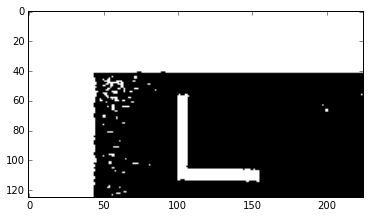

In [178]:
p = bnw_image
display(p)

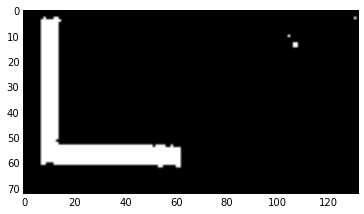

In [179]:
p = bnw_image[53:125,93:225]
display(p)

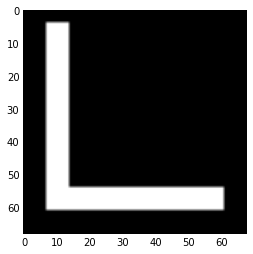

In [180]:
display(bnw_kernel)

In [166]:
47097494

47097494

In [36]:
(6*(56+47)*255)

157590

In [64]:
import os
os.chdir('C:\Users\dhrre\Desktop\KISHORE_grid\KISHORE_grid')

In [65]:
import cv2

image  = cv2.imread("region_of_interest.jpg")
kernel = cv2.imread("kernel_black_and_white.jpg")
kernel_1 = cv2.imread("kernel.jpg")

In [68]:
def rgb_to_bnw(image,threshold) : 
    return_image = []
    for row in image : 
        return_image.append([])
        for pixel in row :
            try:
                [r,g,b,s] = pixel
            except ValueError:
                [r,g,b] = pixel
            magnitude= (int(r)+int(g)+int(b))/3
            if(magnitude < threshold) : 
                return_image[-1].append(1)
            else:
                return_image[-1].append(255)
    return return_image

def convolution(image,kernel) : 
    # scaling_factor = kernel[0]
    # kernel = kernel[1]
    image_width = len(image[0])
    image_height = len(image)
    kernel_width = len(kernel[0])
    kernel_height = len(kernel)

    def element_wise_matrix_multiplication(matrix1,matrix2,scaling_factor=1) :
        return_value = 0
        for m1_row,m2_row in zip(matrix1,matrix2) :
            for m1_pixel,m2_pixel in zip(m1_row,m2_row) :
                return_value += int(m1_pixel)*int(m2_pixel)
        return (return_value/scaling_factor)

    return_image = []
    for row in range(image_height - kernel_height + 1) :
        return_image.append([])
        for pixel in range(image_width - kernel_width + 1) :
            image_slice = []
            for i in range(row,row + kernel_height):
                image_slice.append([])
                for j in range(pixel,pixel + kernel_width):
                    image_slice[-1].append(image[i][j])
        return_image[-1].append(element_wise_matrix_multiplication(image_slice,kernel))
    return (return_image)

def modify_kernel(kernel):
    for i in range(len(kernel)):
        for j in range(len(kernel[i])):
            if(kernel[i][j] == 1):
                kernel[i][j] = -1
            else:
                kernel[i][j] = 1
    return kernel

In [69]:
bnw_kernel = rgb_to_bnw(kernel_1,200)
kernel = modify_kernel(bnw_kernel)

In [59]:
for i in range(len(kernel)):
    for j in range(len(kernel[i])):
        kernel[i][j] = 